In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [12]:
# Create Dataset
x = 6* np.random.rand(100,1)- 3 # 3 for some random outlier

# Quadratic Equation (y=0.5x^2 + 1.5x + outlier)
y = 3*x**2 + 1.5*x + 2 + np.random.randn(100,1)

Text(0.5, 0, 'X Dataset')

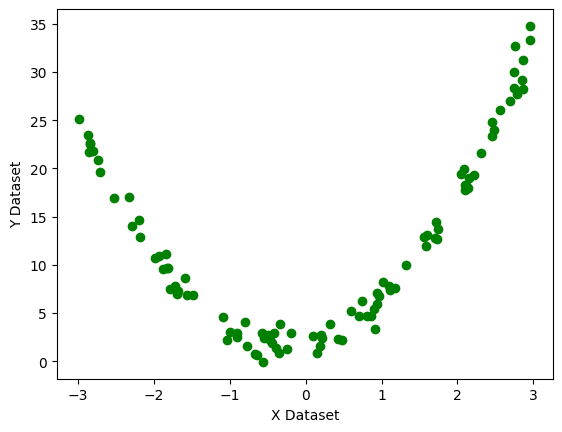

In [13]:
plt.scatter(x,y,color='g')
plt.ylabel("Y Dataset")
plt.xlabel("X Dataset")

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
# Implement Simple Linear regression
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [16]:
regression_1.fit(x_train,y_train)

LinearRegression()

In [17]:
from sklearn.metrics import r2_score
score = r2_score(y_test,regression_1.predict(x_test))
print(score)

-0.31192562941834723


Text(0, 0.5, 'Y Dataset')

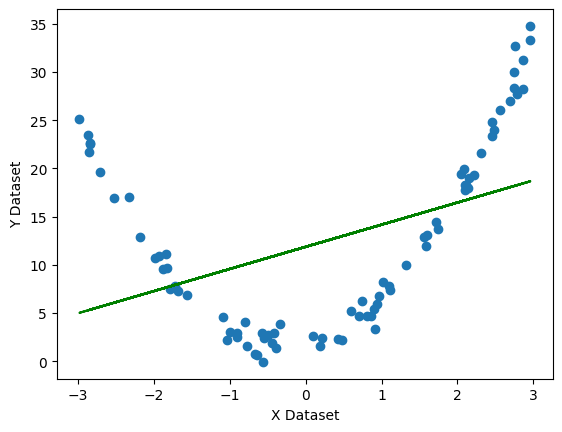

In [18]:
# Visualisation
plt.plot(x_train,regression_1.predict(x_train),color='g')
plt.scatter(x_train,y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y Dataset")

In [19]:
# Polynomial Transformation
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [ ]:
# x_train_poly

In [26]:
regression_2 = LinearRegression()
regression_2.fit(x_train_poly,y_train)
score = r2_score(y_test,regression_2.predict(x_test_poly))
print(score)

0.9835148997899281


In [27]:
print(regression_2.coef_)

[[0.         1.51119801 3.05715791]]


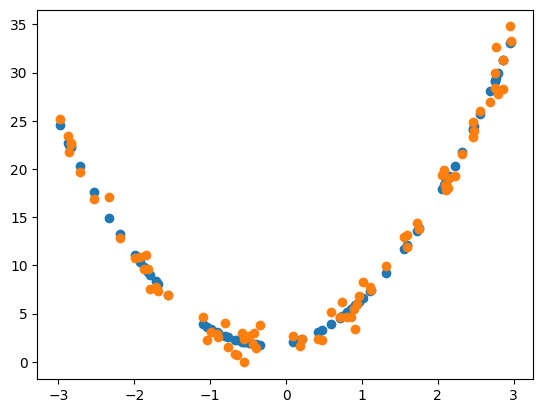

In [ ]:
# Plot
plt.scatter(x_train, regression_2.predict(x_train_poly)) # best fit line
plt.scatter(x_train,y_train) # all data points

In [34]:
# Prediction on new Data
x_new = np.linspace(-3 , 3, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)

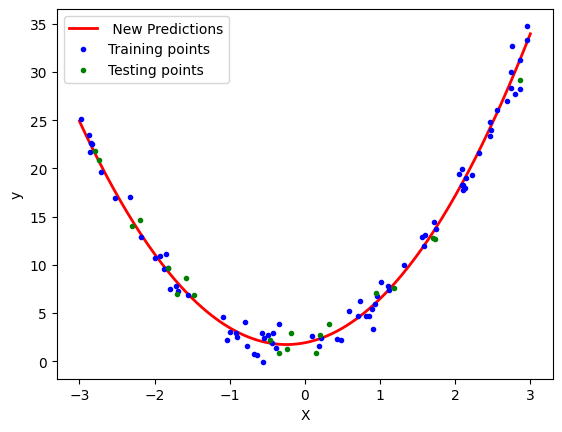

In [35]:
y_new = regression_2.predict(x_new_poly)
plt.plot(x_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()